In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from itertools import chain


datpath = "https://raw.githubusercontent.com/pokepokepokedex/Pokedex/master/Pokemon.csv"

def cleansk(datf: pd.DataFrame) -> pd.DataFrame: 
    return (datf.fillna('') # note: type 2 is the only one with any nulls at all
                .assign(Legendary = [1 if x else 0 for x in datf.Legendary], 
                      Type = [f"{x}_{y}" for x,y in zip(datf['Type 1'], datf['Type 2'])])
                .drop(['Type 1', 'Type 2'], axis=1))

df = pd.read_csv(datpath).pipe(cleansk)

t=df.shape
print(f"shape: {t}")
print(f"ratio: {np.divide(t[0], t[1]):.5}")

df.head()

shape: (800, 12)
ratio: 66.667


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,0,Grass_Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,0,Grass_Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,0,Grass_Poison
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,Grass_Poison
4,4,Charmander,309,39,52,43,60,50,65,1,0,Fire_nan


In [2]:
X = df.drop(['Generation', '#', 'Name', 'Type'], axis=1)
y = df.Generation

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=10**4).fit(X_train, y_train)

model.score(X_test, y_test)

0.145

/home/quinn/anaconda3/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


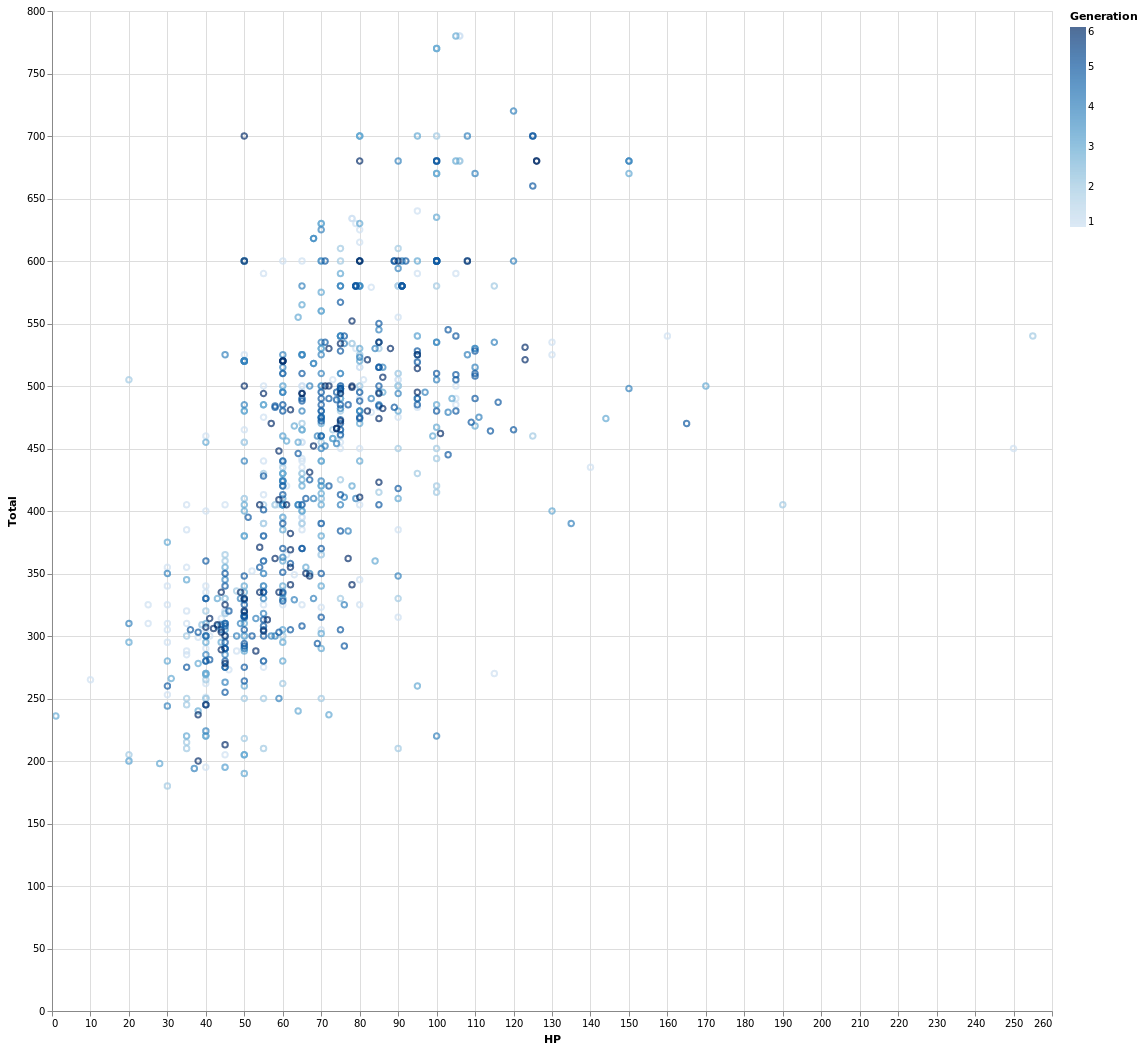

In [3]:
alt.Chart(df, width=1000, height=1000).mark_point().encode(x='HP', 
                                                           y='Total', 
                                                           color='Generation')

In [12]:
types = set(chain.from_iterable(pd.read_csv(datpath)[['Type 1', 'Type 2']].values)) - {np.nan}

ordering = pd.DataFrame(np.ones((len(types), len(types))), columns=types, index=types)

#np.testing.assert_almost_equal(ordering.values, -1 * ordering.T.values)

ordering.Normal.Ghost = 0
ordering.Normal[['Rock', 'Steel']] = 0.5
ordering.Fire[['Fire', 'Water', 'Rock', 'Dragon']] = 0.5
ordering.Fire[['Grass', 'Ice', 'Bug', 'Steel']] = 2
ordering.Water[['Water', 'Grass', 'Dragon']] = 0.5
ordering.Water[['Fire', 'Ground', 'Rock']] = 2
## ... only 14 more! 

ordering.Ghost.Normal = 0
ordering.Ghost.Fighting = 2

ordering

,Steel,Fire,Grass,Flying,Psychic,Ghost,Dark,Poison,Dragon,Bug,Fighting,Rock,Ice,Water,Electric,Ground,Fairy,Normal
Steel,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
Fire,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
Grass,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0
Flying,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Psychic,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ghost,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Dark,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Poison,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Dragon,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0
Bug,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
